
# Task 5: Data Analysis on CSV Files
**Objective:** Analyze sales data using Pandas  
**Tools:** Python, Pandas, Matplotlib, Seaborn


In [6]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [25]:

# Load Dataset
csv_file = files.upload()


Saving Sales Dataset.csv to Sales Dataset (1).csv


In [26]:
df = pd.read_csv('Sales Dataset.csv')

In [27]:

# Basic Overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
display(df.info())
print("\nSummary Statistics:")
display(df.describe())


Dataset Shape: (1194, 12)

First 5 rows:


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


None


Summary Statistics:


,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [28]:

# Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values or drop
df = df.fillna(0)
df.drop_duplicates(inplace=True)



Missing Values:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64


/tmp/ipython-input-1871299001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_category, x='Category', y='Profit', palette='viridis')


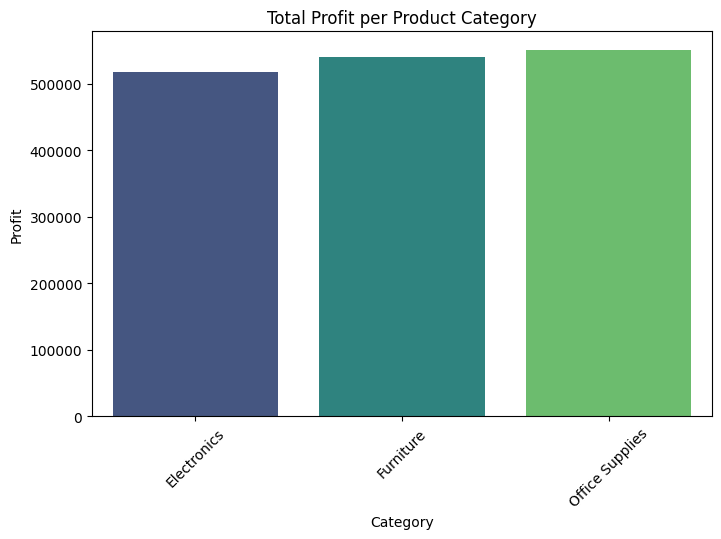

In [29]:

# Exploratory Data Analysis (EDA)

## a) Total Profit per Product Category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=profit_by_category, x='Category', y='Profit', palette='viridis')
plt.title("Total Profit per Product Category")
plt.xticks(rotation=45)
plt.show()


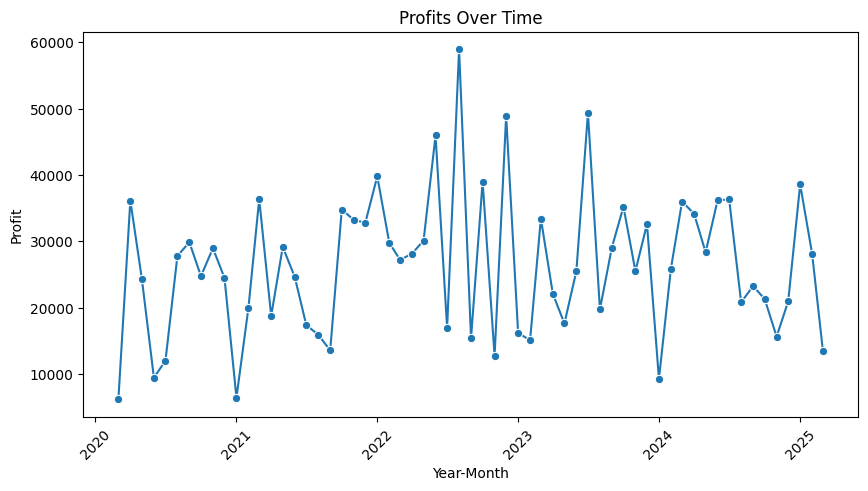

In [30]:

## b) Profit Trend Over Time
if 'Year-Month' in df.columns:
    df['Year-Month'] = pd.to_datetime(df['Year-Month'])
    profits_over_time = df.groupby('Year-Month')['Profit'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=profits_over_time, x='Year-Month', y='Profit', marker='o')
    plt.title("Profits Over Time")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-265159308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Profit', y='CustomerName', palette='magma')


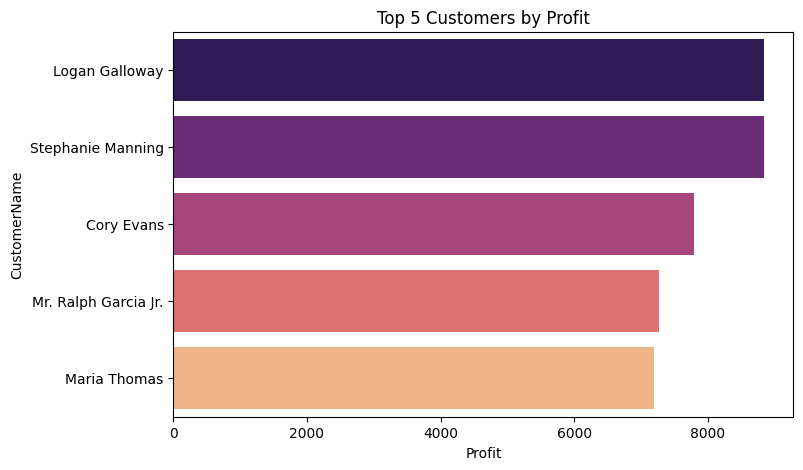

In [31]:

## c) Top 5 Customers by Profit
if 'CustomerName' in df.columns:
    top_customers = df.groupby('CustomerName')['Profit'].sum().nlargest(5).reset_index()
    plt.figure(figsize=(8,5))
    sns.barplot(data=top_customers, x='Profit', y='CustomerName', palette='magma')
    plt.title("Top 5 Customers by Profit")
    plt.show()


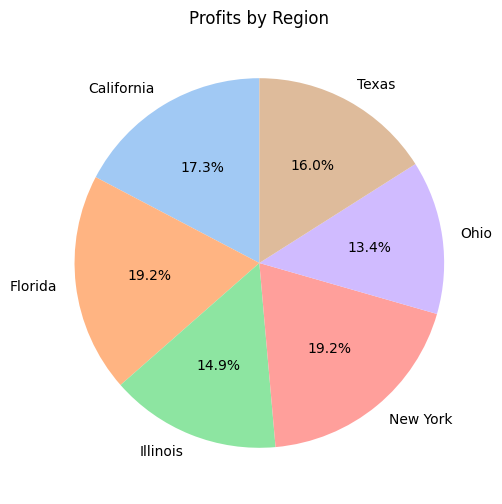

In [32]:

## d) Profits by Region (Pie Chart)
if 'State' in df.columns:
    profits_by_region = df.groupby('State')['Profit'].sum()
    plt.figure(figsize=(6,6))
    profits_by_region.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title("Profits by Region")
    plt.ylabel("")
    plt.show()


In [33]:

# Additional Insights
print("\nUnique Product Categories:", df['Category'].nunique())
if 'CustomerName' in df.columns:
    print("Unique Customers:", df['CustomerName'].nunique())
print("Highest Selling Product:", profit_by_category.loc[profit_by_category['Profit'].idxmax(), 'Category'])



Unique Product Categories: 3
Unique Customers: 802
Highest Selling Product: Office Supplies



## Conclusion
**Insights:**  
- The highest selling product category is shown above.  
- Profit trends over time, product category performance, and top customers are visible in the charts.  
- Regions with the highest profits are highlighted in the pie chart.  
